In [33]:
# Import pandas
import geopandas
import geoplot
import pandas as pd
import numpy as np
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [34]:
# Load in the listings data
df_data =pd.read_csv('/Users/estebanm/Desktop/2024-DS-Tue/Week-03-Data_Analytics-Data_Viz-BI_tools/data/listings.csv')

####  Exercise 1: Create a bar chart and dataframe of top 10 Neigborhoods that have the most expensive listsings on average. 
Our goal is to make a chart reflecting the top 10 most expensive Neighborhoods.
This is a little dubious - we assign "expensive" by calculating the average cost of 
an AirBnB in each neighborhood.

1. Make a dataframe that sorts the neighborhood field by decending price.  
1. Use head to cut back top the top 10
1. Use pandas.plot.barh to generate a histogram (see [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html) wiki for details on pandas.plot.barh)
1. Display the data that you used to create the bar chart as a table with neighborhood and average price as the columns.  You want this to match the pivot that you create in youur dashboard

       neighbourhood   price
0           Allerton   92.81
1      Arden Heights  119.20
2           Arrochar  125.05
3            Arverne  249.07
4            Astoria   97.30
..               ...     ...
217  Windsor Terrace  129.74
218        Woodhaven   71.99
219         Woodlawn   99.17
220          Woodrow  700.00
221         Woodside   61.47

[222 rows x 2 columns]
          neighbourhood   price
82       Fort Wadsworth  800.00
220             Woodrow  700.00
175            Sea Gate  418.23
198             Tribeca  381.11
75    Flatiron District  367.42
22            Briarwood  366.16
73   Financial District  335.39
216         Willowbrook  309.00
196         Tottenville  309.00
158        Prince's Bay  300.00


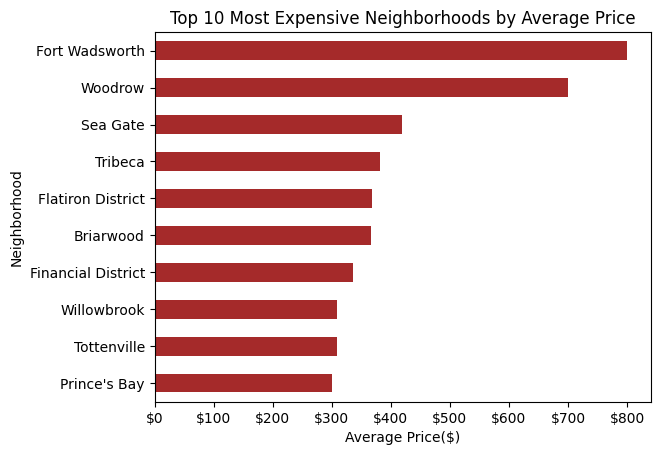

In [46]:
# our goal is to make a chart reflecting the top 10 most expensive Neighborhoods
# This is a little dubious - we assign "expensive" by calculating the average cost of 
# an AirBnB in each neighborhood, then we take the top ten and weight each slice 
# by the average value.
#
# make a dataframe that sorts the neighborhood field by decending price.  
# Use head to cut back top the top 10. Then, use df.plot.barh to generate a histogram.

# so we first want to group the data and then we calculate the average
neighborhood_avg_price = df_data.groupby('neighbourhood')['price'].mean().reset_index()

print(round(neighborhood_avg_price, 2))

# now we only want the top 10 SORTED!
top_10_neighborhoods = neighborhood_avg_price.sort_values(by='price', ascending=False).head(10)


print(round(top_10_neighborhoods, 2))

# now we plot...
fig, ax = plt.subplots() 
top_10_neighborhoods.plot.barh(x='neighbourhood', y='price', legend=False, color='brown', ax=ax)

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${int(x):,}'))
ax.invert_yaxis()

plt.xlabel('Average Price($)')
plt.ylabel('Neighborhood')
plt.title('Top 10 Most Expensive Neighborhoods by Average Price')
plt.show()


          neighbourhood   price
82       Fort Wadsworth  800.00
220             Woodrow  700.00
175            Sea Gate  418.23
198             Tribeca  381.11
75    Flatiron District  367.42
22            Briarwood  366.16
73   Financial District  335.39
216         Willowbrook  309.00
196         Tottenville  309.00
158        Prince's Bay  300.00


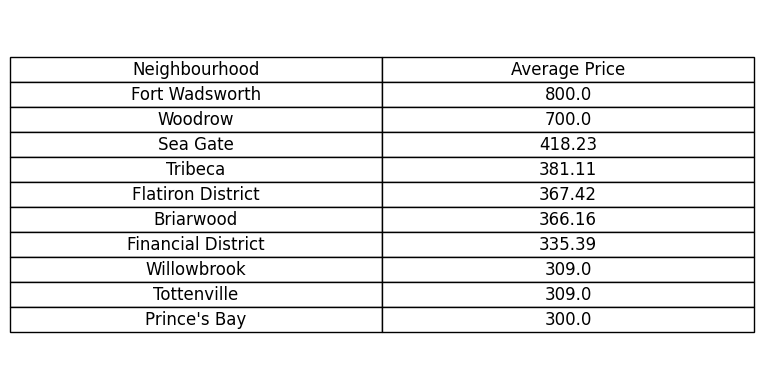

In [67]:
# Now, display the top 10 datframe you created as a table with columns
# neighbourhood and price

table = top_10_neighborhoods[['neighbourhood', 'price']]

print(round(table,2))

table['price'] = table['price'].round(2)

fig, ax = plt.subplots()

ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

table_data = table.values
column_labels = ['Neighbourhood', 'Average Price']

table = ax.table(cellText=table_data, colLabels=column_labels, loc='center', cellLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.5)

plt.show()




####  Exercise 2: Create a bar chart and dataframe of top 10 Neigborhoods that have the LEAST expensive listsings on average. 

Do the same thing you just did, but get the 10 least expensive neighborhoods.  Sort them from lowest average price to highest.  Bew wure to provide a pivot table.

                  neighbourhood  price
181                 South Beach  45.00
27                  Bull's Head  49.67
157               Port Richmond  51.22
180                   Soundview  52.06
141                New Brighton  52.25
9    Bay Terrace, Staten Island  55.00
103                 Hunts Point  56.58
201          University Heights  57.83
89                   Grant City  58.40
150                   Olinville  59.43


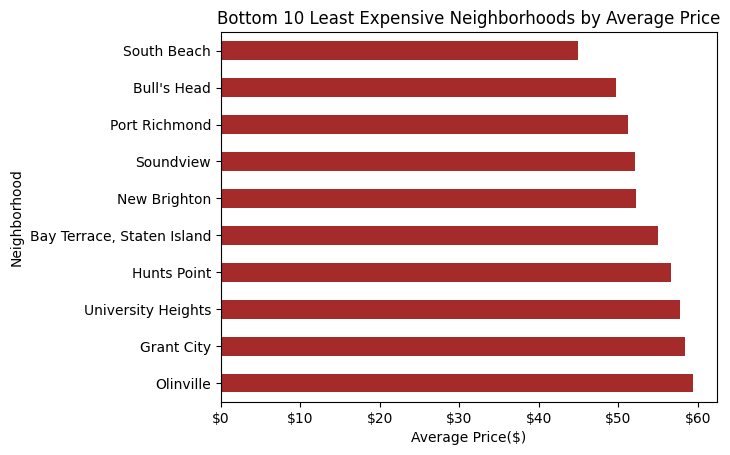

In [63]:
# Here we make the same chart using the bottom 10 Neighborhoods
# by average price.  We sort ascending in this one.

#now we plot...
bottom_10_neighborhoods = neighborhood_avg_price.sort_values(by='price', ascending=True).head(10)

print(round(bottom_10_neighborhoods,2))

fig, ax = plt.subplots() 
bottom_10_neighborhoods.plot.barh(x='neighbourhood', y='price', legend=False, color='brown', ax=ax)

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${int(x):,}'))
ax.invert_yaxis()


plt.xlabel('Average Price($)')
plt.ylabel('Neighborhood')
plt.title('Bottom 10 Least Expensive Neighborhoods by Average Price')
plt.show()




                            price
neighbourhood                    
Bay Terrace, Staten Island  55.00
Bull's Head                 49.67
Grant City                  58.40
Hunts Point                 56.58
New Brighton                52.25
Olinville                   59.43
Port Richmond               51.22
Soundview                   52.06
South Beach                 45.00
University Heights          57.83


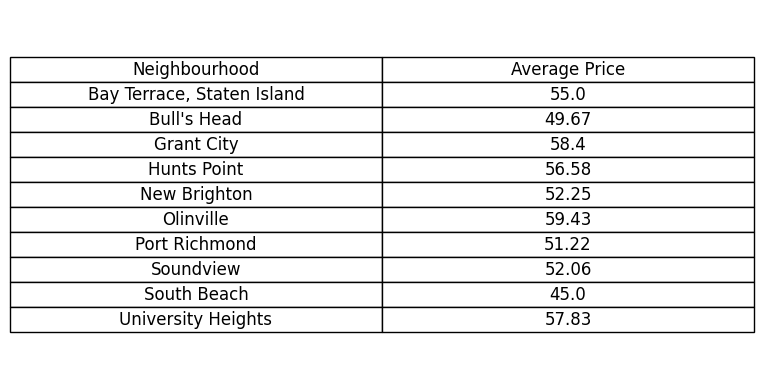

In [64]:
# we also would like to have the corresponding pivot table of the lowest 10

pivot_table = pd.pivot_table(bottom_10_neighborhoods, index='neighbourhood', values='price', aggfunc='mean')



print(round(pivot_table,2))

pivot_table = pd.pivot_table(bottom_10_neighborhoods, index='neighbourhood', values='price', aggfunc='mean').reset_index()
pivot_table['price'] = pivot_table['price'].round(2)


fig, ax = plt.subplots()

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

table_data = pivot_table.values
column_labels = ['Neighbourhood', 'Average Price']

table = ax.table(cellText=table_data, colLabels=column_labels, loc='center', cellLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.5)

plt.show()





#  Now make all four widgets (the two charts and the two dataframes) in a Tableau dashboard!

In [69]:

top_10_neighborhoods.to_csv('/Users/estebanm/Desktop/2024-DS-Tue/Week-03-Data_Analytics-Data_Viz-BI_tools/data/top_10_neighborhoods.csv', index=False)

bottom_10_neighborhoods.to_csv('/Users/estebanm/Desktop/2024-DS-Tue/Week-03-Data_Analytics-Data_Viz-BI_tools/data/bottom_10_neighborhoods.csv', index=False)
